# Project Work
# CMSE 202 final project
## Group 0

## <p style="text-align: right;"> &#9989; Jose, Narayana, Max, Insaan

## Imports and reading in the data
---

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics

In [96]:
#Reading data in
housing = pd.read_csv("realtor-data.zip.csv", delimiter = ',')
housing = housing.dropna()
housing

## 1. Masking Data based on State

---

In [4]:
#Splitting houses sold and houses still for sale
sold_houses = housing[housing["status"] == "sold"]
for_sale_houses = housing[housing["status"] == "for_sale"]

In [97]:
#Masking based on state.
MI = housing[housing["state"] == "Michigan"]

## 2. First Linear Regression model with entire dataset

---

In [6]:
# Linear Regression model made with entire dataset
x = housing["price"]
y = housing["house_size"]
X = sm.add_constant(x)

model = sm.OLS(y, X)
results = model.fit()
print("Regression Results for Houses Dataset")
print(results.summary())

Regression Results for Houses Dataset
                            OLS Regression Results                            
Dep. Variable:             house_size   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                 3.962e+04
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:44:39   Log-Likelihood:            -1.0119e+07
No. Observations:             1084909   AIC:                         2.024e+07
Df Residuals:                 1084907   BIC:                         2.024e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       18

## 3a. Linear Regression within state of Michigan.

---

In [92]:
# This code runs a linear regression for all houses in the state of michigan (according to the data set)
x = MI["price"]
y = MI["house_size"]
X = sm.add_constant(x)

model = sm.OLS(y, X)
results = model.fit()
print("Regression Results for Michigan Houses")
print(results.summary())

Regression Results for Michigan Houses
                            OLS Regression Results                            
Dep. Variable:             house_size   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                 1.155e+04
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:54:49   Log-Likelihood:            -1.1990e+05
No. Observations:               14806   AIC:                         2.398e+05
Df Residuals:                   14804   BIC:                         2.398e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1

### 3b. Masking even more houses with East Lansing specifically.

---

In [91]:
# Splitting Michigan houses into just East Lansing homes
EL = MI[MI["city"] == "East Lansing"]

# Splitting East Lansing Homes by houses for sale and old
EL_sale = EL[EL["status"] == "for_sale"]
print(f"There are {len(EL)} homes in East Lansing within this dataset.")

There are 150 homes in East Lansing within this dataset.


### 3c. Plot of Price vs House Size, with different number of beds sorted by color.

---

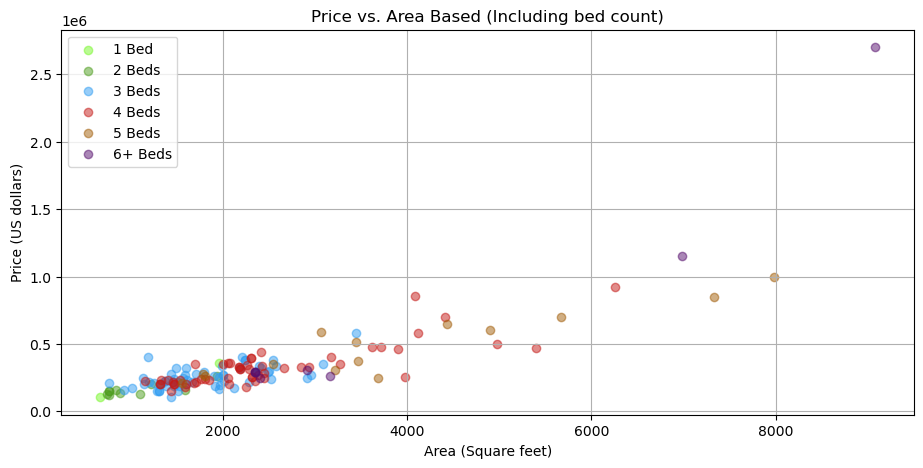

In [9]:
#T his code separates the east lansing houses by bed count, stores them into different variables,
# then plots them with different colors based off their number of beds

EL_1_bed = EL[EL["bed"] == 1]
EL_2_bed = EL[EL["bed"] == 2]
EL_3_bed = EL[EL["bed"] == 3]
EL_4_bed = EL[EL["bed"] == 4]
EL_5_bed = EL[EL["bed"] == 5]
EL_6_bed = EL[EL["bed"] >= 6]

EL_4000 = EL.loc[(EL["house_size"] > 3000) & (EL["house_size"] <= 4000)]
EL_5000 = EL.loc[(EL["house_size"] > 4000) & (EL["house_size"] <= 5000)]


plt.figure(figsize=(11, 5))
plt.scatter(EL_1_bed["house_size"], EL_1_bed["price"], c='#77F729', alpha=0.5, label = "1 Bed")
plt.scatter(EL_2_bed["house_size"], EL_2_bed["price"], c='#4D9D1D', alpha=0.5, label = "2 Beds")
plt.scatter(EL_3_bed["house_size"], EL_3_bed["price"], c='#309DF2', alpha=0.5, label = "3 Beds")
plt.scatter(EL_4_bed["house_size"], EL_4_bed["price"], c='#C51A17', alpha=0.5, label = "4 Beds")
plt.scatter(EL_5_bed ["house_size"], EL_5_bed["price"], c='#A25E09', alpha=0.5, label = "5 Beds")
plt.scatter(EL_6_bed["house_size"], EL_6_bed["price"], c='#57106E', alpha=0.5, label = "6+ Beds")
plt.title('Price vs. Area Based (Including bed count)')
plt.xlabel('Area (Square feet)')
plt.ylabel('Price (US dollars)')
plt.grid(True)
plt.legend()
plt.show()

Same plot as above, just easier to read 0 - 4000


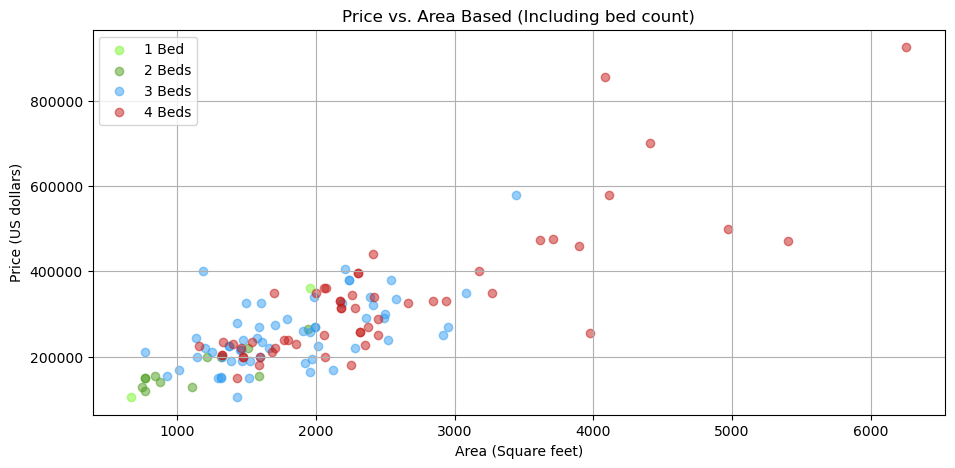

In [10]:
print("Same plot as above, just easier to read 0 - 4000")
plt.figure(figsize=(11, 5))
plt.scatter(EL_1_bed["house_size"], EL_1_bed["price"], c='#77F729', alpha=0.5, label = "1 Bed")
plt.scatter(EL_2_bed["house_size"], EL_2_bed["price"], c='#4D9D1D', alpha=0.5, label = "2 Beds")
plt.scatter(EL_3_bed["house_size"], EL_3_bed["price"], c='#309DF2', alpha=0.5, label = "3 Beds")
plt.scatter(EL_4_bed["house_size"], EL_4_bed["price"], c='#C51A17', alpha=0.5, label = "4 Beds")
plt.title('Price vs. Area Based (Including bed count)')
plt.xlabel('Area (Square feet)')
plt.ylabel('Price (US dollars)')
plt.grid(True)
plt.legend()
plt.show()

### 3d. Multiple Regression of East Lansing houses currently being sold

---

In [90]:
#This is the regression model for JUST the East Lansing houses for sale
X = EL_sale.drop(["brokered_by", "status", "price", "street", "city", "state", "zip_code", "city", "prev_sold_date"], axis = 1)
Y = EL_sale["price"]
    
X = sm.add_constant(X)

multi_model = sm.OLS(Y, X).fit()
print("Regression Results for East Lansing Houses")
print(multi_model.summary())

Regression Results for East Lansing Houses
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     235.6
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           1.06e-27
Time:                        22:53:31   Log-Likelihood:                -584.59
No. Observations:                  46   AIC:                             1179.
Df Residuals:                      41   BIC:                             1188.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

### 3d. Diagnostics plots features within Regression Model

---

Making diagnostics plots for each of the main features within the regression model


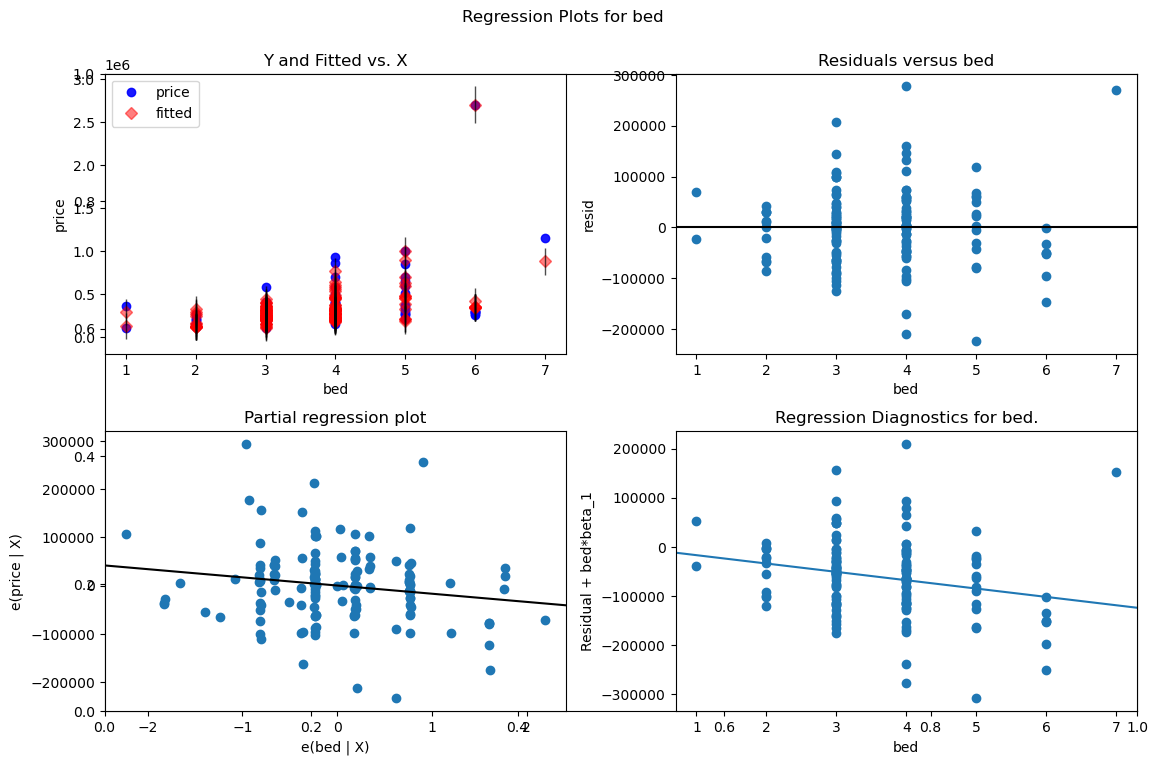

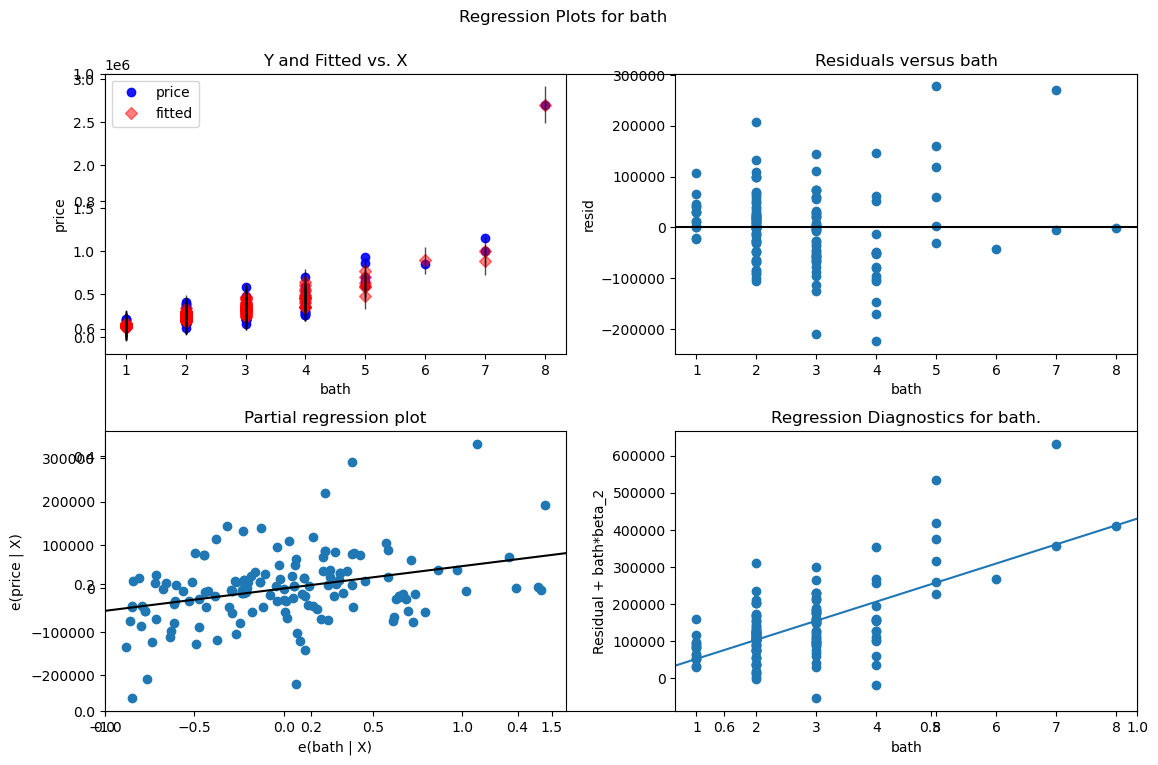

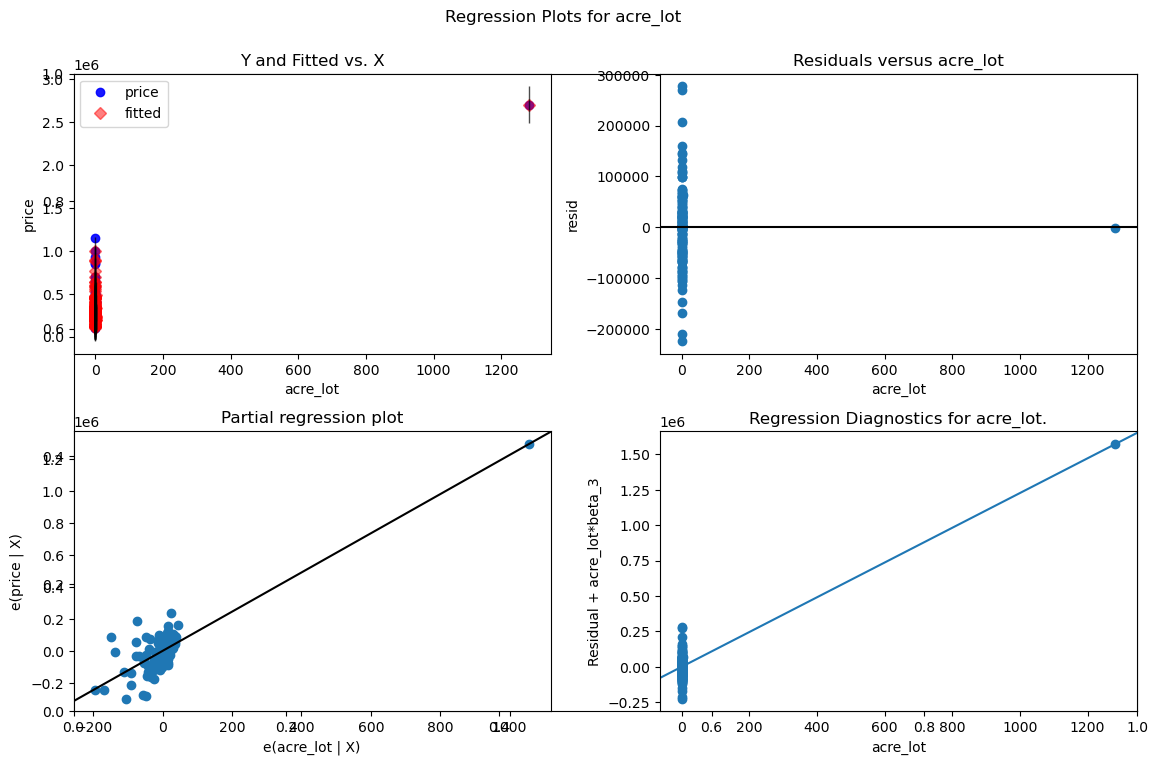

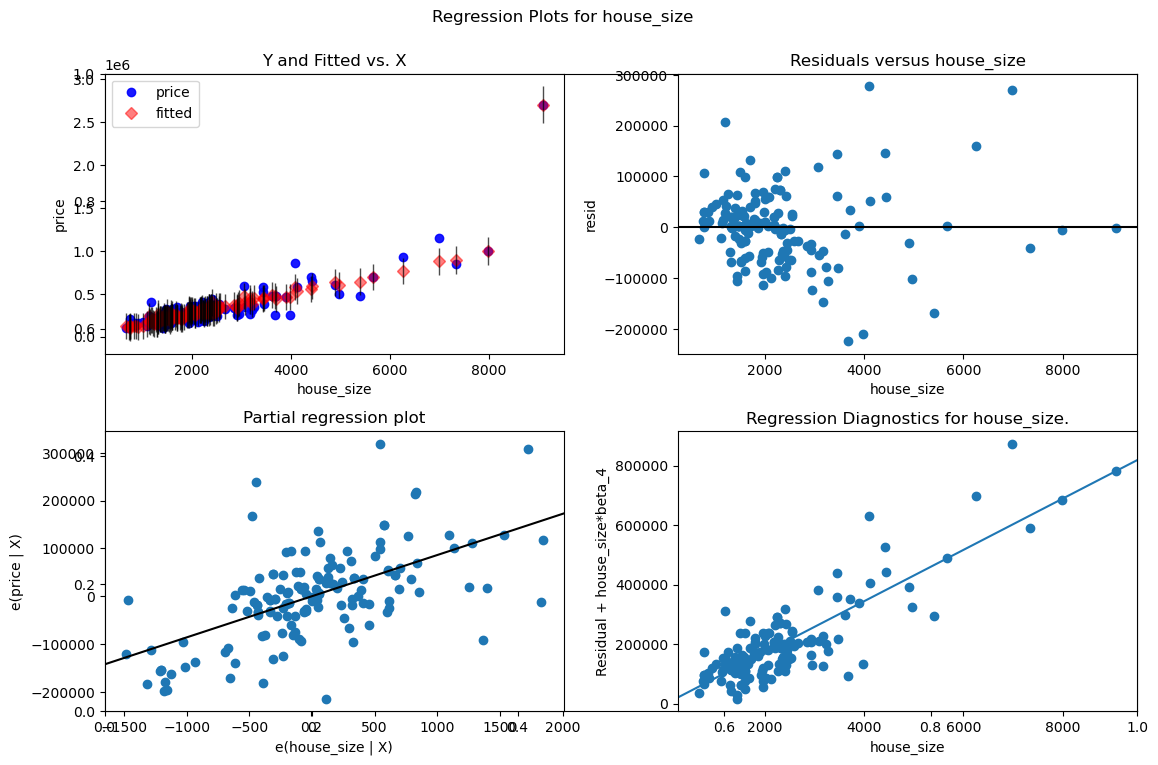

In [89]:
#This code plots each of the unique features within the regression model
print("Making diagnostics plots for each of the main features within the regression model")
for feature in ['bed', 'bath', 'acre_lot', 'house_size']:
    fig, ax = plt.subplots(figsize=(12, 8))
    sm.graphics.plot_regress_exog(multi_model, feature, fig=fig)
    plt.title(f'Regression Diagnostics for {feature}.')
    plt.show()

## 4. Regression results for top 20 biggest universities in US, followed by 20 cities without major colleges

---

In [88]:
# Function used to do multiple regression through all cities being tested
def regress(data, state, city):
    '''
    This function was created for ease of programming when running the multiple regression models
    this takes in the state, city, and dataset we needs to regress, it masks based on the state, and city wanted
    the drops the unnecessary features, and runs a multiple regression model for the specified parameters.
    '''
    
    state_masked = data[data["state"] == state]
    if len(state_masked) == 0:
        pass
    else:      
        city_masked = state_masked[state_masked["city"] == city]
        if len(city_masked) == 0:
            pass
        else:
            X = city_masked.drop(["brokered_by", "status", "price", "street", "city", "state", "zip_code", "city", "prev_sold_date"], axis = 1)
            Y = city_masked["price"]
                
            X = sm.add_constant(X)
            
            multi_model = sm.OLS(Y, X).fit()
            
            print(f"Regression Results for {city} Houses")
            print(multi_model.summary())

In [37]:
# Function used get total list of cities based on state specified
def print_states(state):
    '''
    This function is used to avoid copying and pasting for loops for every state within our specified parameters
    It masks the whole dataset into state based off state, then displays each city within the specified state
    and prints the list of states
    '''
    
    state_masked = housing[housing["state"] == state]
    unique_city = []
    for i in state_masked["city"]:
        if i not in unique_city:
            unique_city.append(i)

    print(unique_city)
    

In [82]:
# This dictionary contains the states of the 20 biggest colleges in the U.S
# Accessed from https://blog.collegevine.com/biggest-colleges-in-the-us
states_w_cities = {"Michigan": ["East Lansing", "Grosse Pointe Woods"], 
          "Arizona": ["Tucson", "Ash Fork"], 
          "Florida": ["Tallahassee", "Gainesville", "Orlando", "Key West"], 
          "Texas": ["Austin", "College Station", "Frisco"], 
          "Pennsylvania": ["University Park", "Cranberry Township"], 
          "Indiana": ["Bloomington", "West Lafayette", "Morgantown"], 
          "Minnesota": ["Minneapolis", "Pine City" ], 
          "Ohio": ["Columbus", "Fostoria"], 
          "New Jersey": ["New Brunswick", "Stillwater"], 
          "Illinois": ["Champaign", "Elgin" ],
          "California": ["Los Angeles", "Northridge", "Oak Park", "San Marcos"],
          "Alabama": ["Tusca Loosa", "Fairhope"],
          "Wisconsin": ["Madison", "Pleasant Prairie"],
          "Iowa": ["Ames", "Council Bluffs"] }


The code below was used to search through each state being tested and show the cities to be compared to. There are thousands of cities within all of these states, so the code is commented out to save scrolling time. Obviously because of the random drafting of comparison cities, these results will be interesting to see, but not have a great basis on why values are so different, as we are not looking at quantity of houses in each city.

In [86]:
#for i in states_w_cities.keys():
#    print(i)
#    print_states(i)


The code below runs the regression for over 20 different cities, if you take a look at the dictionary above, not all states have the same number of cities, that is because according to the website mentioned above, some states had multiple big schools in them, for all states however the last city in each state is the state being compared to, that is, the state that did NOT have a major university in it.

If you look above the first regression, you'll see Text that shows the current state, followed by the cities within the state. Each regression displays the current city in the iteration, it can be very confusing to tell which city you're at, and thus a summary of the findings can be found under the models.

In [83]:
#Code that iterates through each state, then city, and uses above regression function to find results
for state, cities in states_w_cities.items():
    print("")
    print("")
    print(f"{state}'s cities within the dictionary are: {cities}")
    for city in cities:
        print("")
        print("")
        regress(housing, state, city)



Michigan's cities within the dictionary are: ['East Lansing', 'Grosse Pointe Woods']


Regression Results for East Lansing Houses
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     398.3
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           4.15e-77
Time:                        22:18:00   Log-Likelihood:                -1894.7
No. Observations:                 150   AIC:                             3799.
Df Residuals:                     145   BIC:                             3814.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]

/opt/miniconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/miniconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Regression Results for Minneapolis Houses
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     1046.
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:18:02   Log-Likelihood:                -40832.
No. Observations:                3008   AIC:                         8.167e+04
Df Residuals:                    3003   BIC:                         8.170e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

/opt/miniconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Regression Results for Champaign Houses
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     396.9
Date:                Sat, 20 Apr 2024   Prob (F-statistic):          3.42e-136
Time:                        22:18:02   Log-Likelihood:                -5202.2
No. Observations:                 396   AIC:                         1.041e+04
Df Residuals:                     391   BIC:                         1.043e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

## 5. Summary of Results

---

The adjusted r-squared values were the values compared in this evaluation, some cities in this data-set did not have all of the features used to compare, which is a shame, as some of the cities are in the top 20 biggest universities according to our source, so the option of changing the city wasn't exactly applicable, so University Park in Pennsylvania, and Tusca Loosa in Alabama weren't able to determine r-squared values.

In terms of the states that were successful, the college cities in Michigan, Arizona, Minnesota, and Illinois all have higher adjusted R-squared values than their counterparts without major universities. While the Big University cities in Ohio, New Jersey, Iowa, and Wisconsin all have lower R-squared values than their counterparts, The states that had multiple universities in them, like Florida, Texas, Indiana, and California have mixed results, with some being above the city without a major university, and some below.

What this means is that the features used to make these models: Based on these few cities, would lean more towards the non-major university cities fitting the model better than the big university cities. But in some cases its the opposite.

It's also important to consider the fact that we don't have the financial status of these cities in general, we are given the prices of the houses, but that doesn't show the political side of things, and the overall status of each city, so there are some limitations to these models to acknowledge.

In [85]:
#Code prints each city and its respective r squared values 
adjust_rs = [ 0.914, 0.847, 0.713, 0.583, 0.839, 0.824, 0.534, 0.587, 0.708, 0.753, 0.734, "nan", 0.807, 0.452, 0.870, 0.514, 
             0.582, 0.352, 0.606, 0.865, 0.420, 0.880, 0.800, 0.769, 0.629, 0.889, 0.911, 0.672, "nan", 0.377, 0.558, 0.725, 0.656, 0.779]

count = 0
for state, cities in states_w_cities.items():
    print("")
    print(state)
    print("-----------------------------------------")
    for city in cities:
        print(f"{city}'s r-squared is: {adjust_rs[count]}")
        count += 1


Michigan
-----------------------------------------
East Lansing's r-squared is: 0.914
Grosse Pointe Woods's r-squared is: 0.847

Arizona
-----------------------------------------
Tucson's r-squared is: 0.713
Ash Fork's r-squared is: 0.583

Florida
-----------------------------------------
Tallahassee's r-squared is: 0.839
Gainesville's r-squared is: 0.824
Orlando's r-squared is: 0.534
Key West's r-squared is: 0.587

Texas
-----------------------------------------
Austin's r-squared is: 0.708
College Station's r-squared is: 0.753
Frisco's r-squared is: 0.734

Pennsylvania
-----------------------------------------
University Park's r-squared is: nan
Cranberry Township's r-squared is: 0.807

Indiana
-----------------------------------------
Bloomington's r-squared is: 0.452
West Lafayette's r-squared is: 0.87
Morgantown's r-squared is: 0.514

Minnesota
-----------------------------------------
Minneapolis's r-squared is: 0.582
Pine City's r-squared is: 0.352

Ohio
-----------------------